In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('C:/Udemy/Projects/SVR/Position Salaries.csv')

In [23]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [34]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:].values

In [35]:
X, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64), array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]], dtype=int64))

In [10]:
from sklearn.svm import SVR

In [12]:
regressor = SVR(kernel= 'rbf')   # Kernal value can be Linear, Polynomial, sigmoid etc.  rbf is the most common one and also the default
regressor.fit(X, y)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
y_pred = regressor.predict (6.5)

In [14]:
y_pred

array([130001.55760156])

In [ ]:
# This does not look good as the employee said a higher value for the experience of 6.5 years

Text(0,0.5,'Salary')

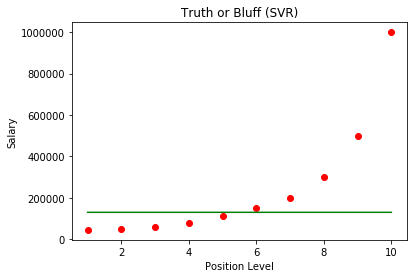

In [16]:

plt.scatter(X,y,color = 'red')
plt.plot(X,regressor.predict(X), color = 'green')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

In [17]:
# In SVR, feature scaling is not implemented unlike other ML models which has does feature scaling. 
# So here we need to implement feature scaling
# We will again run the complete kernel, but now before running the SVR we will do featur scaling and then apply SVR.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
SC_X = StandardScaler()
SC_y = StandardScaler()
X = SC_X.fit_transform(X)
y = SC_y.fit_transform(y)

C:\Users\shibim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [38]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [40]:

regressor = SVR(kernel= 'rbf')   # Kernal value can be Linear, Polynomial, sigmoid etc.  rbf is the most common one and also the default
regressor.fit(X, y)

C:\Users\shibim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0,0.5,'Salary')

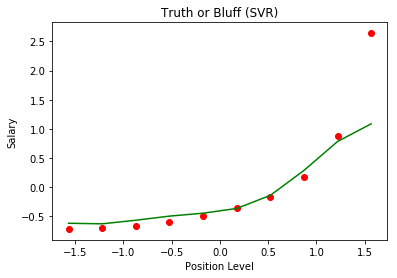

In [41]:
plt.scatter(X,y,color = 'red')
plt.plot(X,regressor.predict(X), color = 'green')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

In [ ]:
# Observe that now the SVR fits the data properly. Also observe that the model does not predict the salary of the CEO properly
# (i.e. the last data point with 10 years experience) since it considers it as an outlier. 

In [42]:
# y_pred = regressor.predict (6.5)

In [43]:
# y_pred

array([0.01158103])

In [51]:
# Since 6.5 the value to be predicted is not transformed, we need to transform it before predicting. We will apply SC_X.transform method
# Now, here 6.5 is a value and the transform method expects an array as input. So we will transform the value to array. Two square
# brackets here indicate that this is an array of 1 row and 1 column i.e. 1 cell. To get the original scaled value, we need to 
# inverse transform method. Since we are predicting the salary y_pred, so we will take SC_y for inverse transformation.
SC_y.inverse_transform(regressor.predict(SC_X.transform(np.array([[6.5]]))))

array([170370.0204065])